In [1]:
# 환경변수에서 API 키 가져오기
import os
from urllib.parse import unquote

# 공공데이터포털에서 받은 데이터 앞에는 unquote 를 불러준다 
# % 가 있으면, unquote 쓴다
API_KEY = unquote(os.environ['ANIMAL_API_KEY'])
LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [2]:
import requests

requests.__version__

'2.21.0'

In [3]:
import pandas as pd

pd.__version__

'0.24.2'

In [4]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [5]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['NanumGothic', 'AppleGothic']:
        plt.rcParams['font.family'] = font.name
        break
        
plt.rcParams['font.family']

['NanumGothic']

In [6]:
import folium

folium.__version__

'0.10.0'

In [7]:
from folium import Map
from folium.plugins import HeatMap

## 동물보호관리시스템 유기동물 조회 서비스 API 사용
많은 데이터를 다루기 위해 한꺼번에 만 개를 얻어오겠습니다.

In [11]:
# 동물보호관리시스템 유기동물 조회 서비스 API

# 미리보기 눌렀을 때 결과값 가져오는 URL 혹은 API KEY 받아오는 페이지에서 End Point 주소
# 원래 URL: http://openapi.animal.go.kr/.../abandonmentPublic?serviceKey=어쩌고&bgnde=20190901&...

# 이렇게 긴 URL을 물음표(?)를 기준으로 두 부분으로 나눕니다.

# 물음표(?) 앞부분
url = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic'

# 물음표(?) 뒷부분
payload = {
    'serviceKey': API_KEY,
    'bgnde': '20190901',
    'endde': '20190930',
    'numOfRows': 10_000,
}

# API 호출
response = requests.get(url, params=payload)

print(response)

<Response [200]>


In [12]:
# 글자수
len(response.text)

7835685

In [14]:
# Key 가 잘못된 경우 실행하면 에러메시지 출력된다
response.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>99</resultCode><resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg></header></response>'

표현에 주목해 보세요. reponse는 응답이고, response.text는 응답 받은 내용입니다. 우리가 파싱해야 하는 대상은 response.text겠죠?

파싱을 하면 우리가 다루기 좋은 트리가 만들어집니다.

https://en.wikipedia.org/wiki/Tree_(data_structure)

컴퓨터의 폴더 구조가 전형적인 트리죠.

트리의 가장 중요한 특징은 우리가 뿌리를 통해 나무 전체를 다룰 수 있다는 겁니다. 예를 들어, Windows의 경우 C:\(C 드라이브 루트)에서 출발하면 모든 파일에 접근할 수 있죠.

In [14]:
import xml.etree.ElementTree as ET

# root 는 Tree 의 기준, root 만 알면 Tree 전체를 알 수 있다
root = ET.fromstring(response.text)

root

<Element 'response' at 0x0000019765BEFB38>

XML에 있던 <item> 항목을 모두 얻어보겠습니다.

ElementTree는 파이썬의 Iterator를 활용해서 이 기능을 제공합니다.

https://wiki.python.org/moin/Iterator

Iterator는 글을 읽을 때 짚는 손가락 같은 역할을 합니다. 지금 가리킨 글자를 읽고 다음 글자로 넘어가죠.

In [15]:
item = next(root.iter('item'))

list(item)

[<Element 'age' at 0x0000019767AFA318>,
 <Element 'careAddr' at 0x0000019767AFA368>,
 <Element 'careNm' at 0x0000019767AFA3B8>,
 <Element 'careTel' at 0x0000019767AFA408>,
 <Element 'chargeNm' at 0x0000019767AFA458>,
 <Element 'colorCd' at 0x0000019767AFA4A8>,
 <Element 'desertionNo' at 0x0000019767AFA4F8>,
 <Element 'filename' at 0x0000019767AFA548>,
 <Element 'happenDt' at 0x0000019767AFA598>,
 <Element 'happenPlace' at 0x0000019767AFA5E8>,
 <Element 'kindCd' at 0x0000019767AFA638>,
 <Element 'neuterYn' at 0x0000019767AFA688>,
 <Element 'noticeEdt' at 0x0000019767AFA6D8>,
 <Element 'noticeNo' at 0x0000019767AFA728>,
 <Element 'noticeSdt' at 0x0000019767AFA778>,
 <Element 'officetel' at 0x0000019767AFA7C8>,
 <Element 'orgNm' at 0x0000019767AFA818>,
 <Element 'popfile' at 0x0000019767AFA868>,
 <Element 'processState' at 0x0000019767AFA8B8>,
 <Element 'sexCd' at 0x0000019767AFA908>,
 <Element 'specialMark' at 0x0000019767AFA958>,
 <Element 'weight' at 0x0000019767AFA9A8>]

In [16]:
child = item.find('kindCd')

child

<Element 'kindCd' at 0x0000019767AFA638>

In [17]:
print(child.text)

[개] 믹스견


In [18]:
print(child.tag)

kindCd


XML은 key와 value를 다루는데 유용합니다. 파이썬의 Dictionary와 같죠.

데이터:

이름: 홍길동
나이: 13세


파이썬:

{
    'name': '홍길동',
    'age:' 13
}


XML:

```
<person>
    <name>홍길동</name>
    <age>13</age>
</person>
```
person, name, age 등이 태그(tag)에 해당합니다.

In [19]:
for child in item:
    print(child.tag, child.text)

age 2016(년생)
careAddr 경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원
careNm 태민동물병원
careTel 055-931-7975
chargeNm 박중언
colorCd 흰색
desertionNo 448548201900232
filename http://www.animal.go.kr/files/shelter/2019/09/201909260809844_s.jpg
happenDt 20190926
happenPlace 용주면 고품2구 부흥리
kindCd [개] 믹스견
neuterYn N
noticeEdt 20191007
noticeNo 경남-합천-2019-00284
noticeSdt 20190926
officetel 055-930-3562
orgNm 경상남도 합천군
popfile http://www.animal.go.kr/files/shelter/2019/09/201909260809844.jpg
processState 보호중
sexCd F
specialMark 활발하고 건강함
weight 10(Kg)


# 태그 활용해서 컬럼명 만들기
### root.iter('tag명') 
- 하나씩 꺼내온다, 성능↑
- Element Tree Library 안에 있는 함수
- XML 데이터를 파싱했을 때 쓴다

In [23]:
item = next(root.iter('item'))

columns = []

for child in item:
#     print(child)
#     print(child.tag)
#     print(child.text)
    columns.append(child.tag)
    
# columns

In [24]:
# XML 데이터를 Pandas DataFrame으로 변환

rows = []

for item in root.iter('item'): # tag 전체(columns) 하나씩 꺼내오기
    row = {}
    for child in list(item):
        row[child.tag] = child.text # Dictionary 에 추가
    rows.append(row) # List 에 추가
    
df = pd.DataFrame(rows, columns=columns)

In [25]:
df

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeEdt,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight
0,2016(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,055-931-7975,박중언,흰색,448548201900232,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,용주면 고품2구 부흥리,...,20191007,경남-합천-2019-00284,20190926,055-930-3562,경상남도 합천군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,활발하고 건강함,10(Kg)
1,2017(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,055-931-7975,박중언,"갈색,흰색",448548201900231,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,용주면 고품2구 부흥리,...,20191007,경남-합천-2019-00283,20190926,055-930-3562,경상남도 합천군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,사람을 잘따르고 온순함,8(Kg)
2,2018(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,055-648-7582,박정재,연갈색/크림색,448533201900660,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,한산도수산 근처,...,20191007,경남-통영-2019-00445,20190926,055-650-6252,경상남도 통영시,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"밧줄노끈 착용,굉장히 겁이 많음",7.7(Kg)
3,2019(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,055-648-7582,박정재,갈색/크림색/흰색,448533201900659,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,도천동 257-1,...,20191007,경남-통영-2019-00444,20190926,055-650-6252,경상남도 통영시,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"생후 7일령의 너무어린 자묘,출산한 모견과 합사/케어 중",0.09(Kg)
4,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,흰색,448532201900789,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해유기동물보호소,...,20191007,경남-창원3-2019-00458,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"1개월, 남매들이 다 닮음, 사람손길을 좋아하는 아이.",1.3(Kg)
5,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,흰,448532201900788,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해유기동물보호소,...,20191007,경남-창원3-2019-00457,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"1개월, 사랑스러움을 타고난 깜찍한 여자아이, 어린강아지들이 너무 많습니다. 눈여겨...",1.3(Kg)
6,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,갈색,448532201900787,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해유기동물보호소,...,20191007,경남-창원3-2019-00456,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"보호소에서 태어난아이,1개월,유일하게 엄마를 닮은 숙녀, 태평한 성격,",1.3(Kg)
7,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,흰,448532201900786,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해유기동물보호소,...,20191007,경남-창원3-2019-00455,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"1개월 1키로에 작은 아이, 순한얼굴, 검정콩 3개, 분홍빛 발가락.",1.0(Kg)
8,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,흰,448532201900785,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해 유기동물보호소,...,20191007,경남-창원3-2019-00454,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"1개월, 보호소에서 태어난 아이,동글동글 귀여운 외모,",1.3(Kg)
9,2017(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,흰,448532201900784,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해구 웅동로 107번길 51,...,20191007,경남-창원3-2019-00453,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,"칩x,진도믹스추정,마르고 배가많이 불러있음, 지치고 힘들어보임.",12.5(Kg)


## 결측치

In [26]:
data = df.isnull().sum()

pd.DataFrame(data)

,0
age,0
careAddr,0
careNm,0
careTel,0
chargeNm,209
colorCd,0
desertionNo,0
filename,0
happenDt,0
happenPlace,0


In [27]:
simple_df = df.drop(columns=[
    'careTel', 'desertionNo', 'filename', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'popfile'
])

simple_df.sample()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight
4588,2018(년생),전라북도 남원시 왕정동 67,하나동물병원,남원시,검정,20190916,남원시 운봉 파출소,[개] 믹스견,U,전라북도 남원시,보호중,M,피부질환,7(Kg)


In [71]:
data = simple_df['age'].value_counts()

pd.DataFrame(data)

,age
2019(년생),5047
2018(년생),1233
2017(년생),1219
2016(년생),921
2014(년생),433
2015(년생),406
2013(년생),237
2009(년생),141
2012(년생),135
2011(년생),114


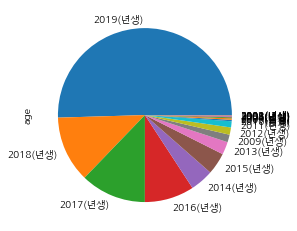

In [29]:
data.plot.pie()
plt.show()

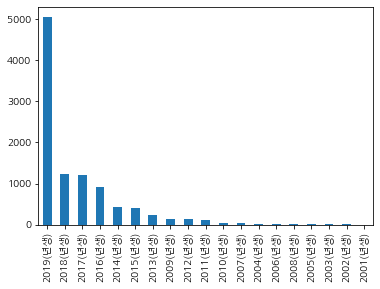

In [42]:
data.plot.bar()

In [ ]:
import seaborn as sns

In [30]:
list(data.index)

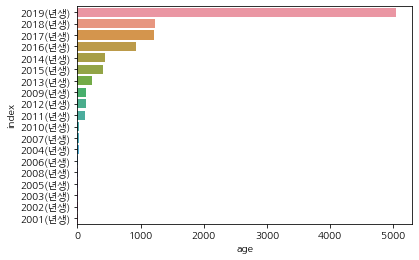

In [45]:
sns.barplot(x='age', y='index', data=data.reset_index())

### 로그함수로 바꿔서 결과 보기

In [51]:
import math

In [72]:
# math.log(data.reset_index()['age'])
data_log = pd.DataFrame(data)
data_log['age_log'] = [math.log(x) for x in list(data.reset_index()['age'])]

# pd.DataFrame(data_log)

In [82]:
data_log = data_log.reset_index()

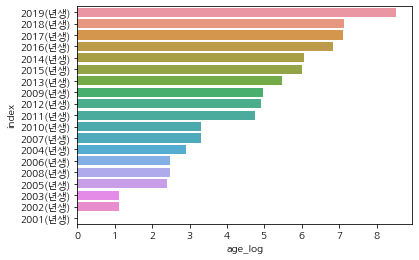

In [83]:
sns.barplot(x='age_log', y='index', data=data_log)

['2019(년생)',
 '2018(년생)',
 '2017(년생)',
 '2016(년생)',
 '2014(년생)',
 '2015(년생)',
 '2013(년생)',
 '2009(년생)',
 '2012(년생)',
 '2011(년생)',
 '2010(년생)',
 '2007(년생)',
 '2004(년생)',
 '2006(년생)',
 '2008(년생)',
 '2005(년생)',
 '2003(년생)',
 '2002(년생)',
 '2001(년생)']

In [52]:
data = simple_df['kindCd'].value_counts()

pd.DataFrame(data)

,kindCd
[개] 믹스견,4536
[고양이] 한국 고양이,2132
[개] 말티즈,436
[개] 푸들,380
[개] 진도견,236
[개] 포메라니안,164
[개] 시츄,121
[개] 요크셔 테리어,85
[개] 스피츠,78
[개] 치와와,72


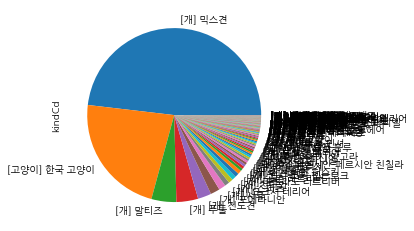

In [54]:
data.plot.pie()
plt.show()

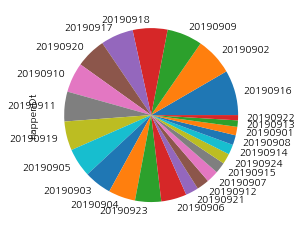

In [56]:
data = simple_df['happenDt'].value_counts()

pd.DataFrame(data)

data.plot.pie()
plt.show()

# Pandas 요일 구하기

In [91]:
pd.to_datetime(simple_df['happenDt']).apply(lambda x: x.day_name()).sample()

5931    Wednesday
Name: happenDt, dtype: object

# Python 요일 구하기

In [47]:
Days = '일월화수목금토'
weekdays = []

for happenDt in simple_df['happenDt']:
    weekday = (int(happenDt) - 20190901) % 7
    weekdays.append(Days[weekday])
    
simple_df['happenDay'] = weekdays
# sipmle_df = simple_df.assign(happenDay=weekdays) # 이게 안됐음 왜 안되냐
simple_df.sample()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay
4785,2014(년생),"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",펫토피아동물병원,이소영,백색,20190916,성남동4123,[개] 말티즈,U,경기도 성남시,보호중,F,어금니 치석심함.,2.9(Kg),월


In [49]:
data = simple_df['happenDay'].value_counts()

data

월    2393
화    2075
수    1982
목    1311
금    1146
토     632
일     461
Name: happenDay, dtype: int64

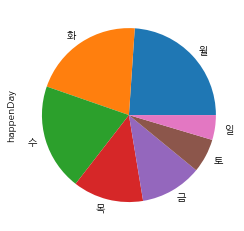

In [50]:
data.plot.pie()

### 결과 확인 후 가설 세우기
- 위의 요일 데이터 확인 후, 

    가설1. 주말에 버려지는 동물이 많다

    가설2. 주중에 발견되는 동물이 많다(시설 근무요일)

# 위도 경도 얻기
반복적으로 쓰기 위해 함수 만든다

In [92]:
def geocode(address):
    url = 'https://us1.locationiq.com/v1/search.php'
    payload = {
        'key': LOCATIONIQ_TOKEN,
        'q': address,
        'format': 'json'
    }
    response = requests.get(url, params=payload)
    results = response.json()
    if 'error' in results:
        return None, None
    coordinates = results[0]
    return coordinates['lat'], coordinates['lon']

In [93]:
geocode('서울창업허브')

('37.54662875', '126.949684293519')

In [94]:
geocode('이 세계 어디에도 없는 주소')

(None, None)

In [95]:
# API 호출 및 지도에 표시하는 작업을 원활히 하기 위해 자료를 500개로 제한해서 sample 데이터를 만듭니다.

sample_df = simple_df.sample(n=500, random_state=1)

sample_df.shape

(500, 15)

In [96]:
# 위도, 경도 얻기

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    print((i + 1)/500, '-', index) # 처리되는 과정 보기
    lat, lng = geocode(sample_df['orgNm'][index])
    lats.append(lat or 0) # None 으로 나오면 0으로 하자(Error 값 처리)
    lngs.append(lng or 0) # 안 보이는 데에 넣어놓는다

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

1 - 9953
2 - 3850
3 - 4962
4 - 3886
5 - 5437
6 - 8517
7 - 2041
8 - 1989
9 - 1933
10 - 9984
11 - 8418
12 - 2418
13 - 6811
14 - 1217
15 - 6978
16 - 6111
17 - 7865
18 - 7781
19 - 7775
20 - 7039
21 - 7673
22 - 2907
23 - 1266
24 - 2370
25 - 3092
26 - 130
27 - 1988
28 - 7877
29 - 6450
30 - 6880
31 - 1768
32 - 9059
33 - 5512
34 - 6343
35 - 6702
36 - 574
37 - 6426
38 - 1520
39 - 9887
40 - 1958
41 - 4487
42 - 859
43 - 2874
44 - 8594
45 - 9725
46 - 3265
47 - 3727
48 - 8738
49 - 4437
50 - 3304
51 - 8133
52 - 8460
53 - 3059
54 - 1764
55 - 7565
56 - 4687
57 - 9781
58 - 4161
59 - 806
60 - 8074
61 - 286
62 - 5131
63 - 7922
64 - 2856
65 - 4061
66 - 4049
67 - 6391
68 - 5194
69 - 2159
70 - 3588
71 - 254
72 - 4543
73 - 5287
74 - 8628
75 - 1125
76 - 9014
77 - 1321
78 - 4146
79 - 9091
80 - 4360
81 - 5993
82 - 5063
83 - 7344
84 - 7437
85 - 5563
86 - 2116
87 - 2023
88 - 9112
89 - 7782
90 - 7204
91 - 222
92 - 218
93 - 6237
94 - 625
95 - 4717
96 - 4699
97 - 3057
98 - 1185
99 - 3207
100 - 9462
101 - 6525
102 - 

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay,lat,lng
9953,2017(년생),경상북도 울릉군 울릉읍 간령길 83-18 (울릉읍) 울릉군농업기술센터,울릉군농업기술센터,박희만,흰색,20190902,저동3길 179-34,[개] 푸들,U,경상북도 울릉군,종료(입양),F,"사람을 잘 따르고, 겁이 많음",2.5(Kg),월,37.5032574,130.865384142679
3850,2019(년생),전라북도 전주시 덕진구 인후동1가 806-6,행복한동물병원,정완순,흰색,20190917,기린봉아파트 뒷길,[개] 믹스견,N,전라북도 전주시,보호중,F,종이박스안에 있었음,0.8(Kg),화,35.8242715,127.1480657
4962,2019(년생),경기도 화성시 우정읍 3.1만세로 29 (우정읍),청산동물병원,김지훈,흑색,20190915,장안면 장안7리,[고양이] 한국 고양이,N,경기도 화성시,종료(자연사),M,포유중 1개월령 어린고양이,0.77(Kg),일,37.1994653,126.8312632
3886,2015(년생),충청북도 진천군 진천읍 읍내리 479-2,진천동물병원,이경난,검정,20190917,광혜원 구암경노당 앞,[개] 셰퍼드,N,충청북도 진천군,보호중,M,이마에 갈색무늬가 있음,30(Kg),화,36.8548,127.4355
5437,2017(년생),충청북도 증평군 도안면 입장길 239 (도안면),괴산증평동물보호센터,이제훈,갈색,20190912,충북 괴산군 불정면 목도로 24,[개] 푸들,N,충청북도 괴산군,보호중,F,사람을 잘따르고 빨간색 방울달린 목테를 하고있음,3(Kg),목,36.815,127.7866


In [97]:
# 위도, 경도만 모읍니다.

coordinates = sample_df[['lat', 'lng']]

coordinates

,lat,lng
9953,37.5032574,130.865384142679
3850,35.8242715,127.1480657
4962,37.1994653,126.8312632
3886,36.8548,127.4355
5437,36.815,127.7866
8517,37.6359398,127.2165051
2041,37.6686,127.0466
1989,37.5070221,126.7220068
1933,35.067279,127.751741
9984,35.9679984,126.7369036


In [102]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(     # Marker Shape
        location=[lat, lng],
        radius=5_000,
        weight=0.1,               # Marker 테두리
        fill_color='#F00',
        fill_opacity=0.1,
    )
    marker.add_to(map)

map

In [99]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map

# jupyter notebook 형태로 공유하기(발표용)
jupyter notebook github 에 올리고 github 주소를 아래 사이트에 넣으면
 
<http://nbviewer.jupyter.org>

# 데이터분석의 목적
- 의사결정을 돕는 것
- 해석해서 결론을 내는 것